## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 18
---------------------------------------

GOALS:

1. Practice Logistic Regression
2. Interpret Logistic Regression Results

----------------------------------------------------------


This homework has **1 Exercise** and **1 Challenge Exercise**

### Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours: Duke 209 <a href="https://joannabieri.com/schedule.html"> Click Here for Joanna's Schedule</a>


### Announcements

**Come to Lab!** If you need help we are here to help!

### Day 18 Assignment - same drill.

1. Make sure you can **Fork** and **Clone** the Day18 repo from [Redlands-DATA101](https://github.com/Redlands-DATA101)
2. Open the file Day18-HW.ipynb and start doing the problems.
    * You can do these problems as you follow along with the lecture notes and video.
3. Get as far as you can before class.
4. Submit what you have so far **Commit** and **Push** to Git.
5. Take the daily check in quiz on **Canvas**.
7. Come to class with lots of questions!

In [313]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# This stops a few warning messages from showing
pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn import metrics

### Data: A collection of Emails

- Emails for the first three months of 2012 for an email account
- Data from 3921 emails and 21 variables on them
- Outcome: whether the email is spam or not
- Predictors: number of characters, whether the email had "Re:" in the subject, time at which email was sent, number of times the word "inherit" shows up in the email, etc.


Data Information: https://www.openintro.org/data/index.php?data=email

This lab follows the Data Science in a Box units "Unit 4 - Deck 6: Logistic regression" by Mine Çetinkaya-Rundel. It has been updated for our class and translated to Python by Joanna Bieri.

In [315]:
file_name = 'data/email.csv'
DF = pd.read_csv(file_name)

In [316]:
DF

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2012-01-01T06:16:41Z,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2012-01-01T07:03:59Z,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01T16:00:32Z,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01T09:09:49Z,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01T10:00:01Z,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,1,0,1,0,0,2012-03-31T00:03:45Z,0,0,0,no,...,0,0,0.332,12,0,0,0,0,0,small
3917,1,0,1,0,0,2012-03-31T14:13:19Z,0,0,1,no,...,0,0,0.323,15,0,0,0,0,0,small
3918,0,1,1,0,0,2012-03-30T16:20:33Z,0,0,0,no,...,0,0,8.656,208,1,0,0,0,5,small
3919,0,1,1,0,0,2012-03-28T16:00:49Z,0,0,0,no,...,0,0,10.185,132,0,0,0,0,0,small


**Exercise 1** Logistic Regression with ONE explanatory variable.

Choose another variable from the data set to use as your explanatory variable and create a Logistic Regression model to predict if an email is spam or not. You should do all of the following:

1. Say what variable you are using to predict spam messages (do some analysis, at minimum a value_counts()). Why do you think this is a good variable to use in predicting if an email is spam.
2. Create and fit a Logistic Regression model.
3. Show the results: intercept, coefficient, basic confusion matrix prediction.
4. What do you think the decision cutoff should be? Update the cutoff and redo the confusion matrix.
5. Explain your results in words. You should talk about False Negative and False positive rates and what they mean in terms of the variables you chose.


In [318]:
DF.columns

Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time', 'image',
       'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number'],
      dtype='object')

In [319]:
DF.dtypes

spam              int64
to_multiple       int64
from              int64
cc                int64
sent_email        int64
time             object
image             int64
attach            int64
dollar            int64
winner           object
inherit           int64
viagra            int64
password          int64
num_char        float64
line_breaks       int64
format            int64
re_subj           int64
exclaim_subj      int64
urgent_subj       int64
exclaim_mess      int64
number           object
dtype: object

In [320]:
DF.describe

<bound method NDFrame.describe of       spam  to_multiple  from  cc  sent_email                  time  image  \
0        0            0     1   0           0  2012-01-01T06:16:41Z      0   
1        0            0     1   0           0  2012-01-01T07:03:59Z      0   
2        0            0     1   0           0  2012-01-01T16:00:32Z      0   
3        0            0     1   0           0  2012-01-01T09:09:49Z      0   
4        0            0     1   0           0  2012-01-01T10:00:01Z      0   
...    ...          ...   ...  ..         ...                   ...    ...   
3916     1            0     1   0           0  2012-03-31T00:03:45Z      0   
3917     1            0     1   0           0  2012-03-31T14:13:19Z      0   
3918     0            1     1   0           0  2012-03-30T16:20:33Z      0   
3919     0            1     1   0           0  2012-03-28T16:00:49Z      0   
3920     1            0     1   0           0  2012-03-31T09:20:24Z      0   

      attach  dollar winner  

In [321]:
DF.isna().sum()

spam            0
to_multiple     0
from            0
cc              0
sent_email      0
time            0
image           0
attach          0
dollar          0
winner          0
inherit         0
viagra          0
password        0
num_char        0
line_breaks     0
format          0
re_subj         0
exclaim_subj    0
urgent_subj     0
exclaim_mess    0
number          0
dtype: int64

In [322]:
DF.value_counts

<bound method DataFrame.value_counts of       spam  to_multiple  from  cc  sent_email                  time  image  \
0        0            0     1   0           0  2012-01-01T06:16:41Z      0   
1        0            0     1   0           0  2012-01-01T07:03:59Z      0   
2        0            0     1   0           0  2012-01-01T16:00:32Z      0   
3        0            0     1   0           0  2012-01-01T09:09:49Z      0   
4        0            0     1   0           0  2012-01-01T10:00:01Z      0   
...    ...          ...   ...  ..         ...                   ...    ...   
3916     1            0     1   0           0  2012-03-31T00:03:45Z      0   
3917     1            0     1   0           0  2012-03-31T14:13:19Z      0   
3918     0            1     1   0           0  2012-03-30T16:20:33Z      0   
3919     0            1     1   0           0  2012-03-28T16:00:49Z      0   
3920     1            0     1   0           0  2012-03-31T09:20:24Z      0   

      attach  dollar wi

In [323]:
DF.dtypes

spam              int64
to_multiple       int64
from              int64
cc                int64
sent_email        int64
time             object
image             int64
attach            int64
dollar            int64
winner           object
inherit           int64
viagra            int64
password          int64
num_char        float64
line_breaks       int64
format            int64
re_subj           int64
exclaim_subj      int64
urgent_subj       int64
exclaim_mess      int64
number           object
dtype: object

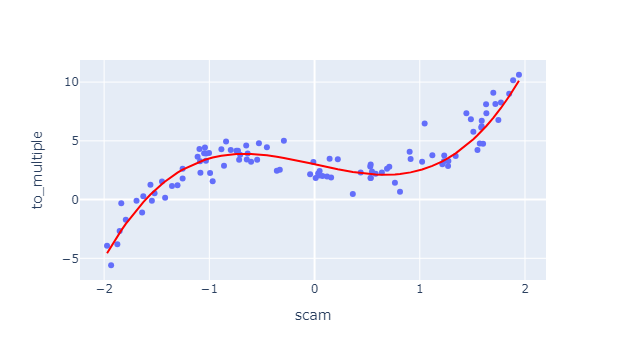

In [324]:
a = 1.5  
b = -2.0  
c = 3.0  
num_points = 100  
noise_level = 1.0  

x = np.random.uniform(-2, 2, num_points)

epsilon = np.random.normal(0, noise_level, num_points)
y = a * x**3 + b * x + c + epsilon
y_nonoise = a * x**3 + b * x + c

DF = pd.DataFrame()
DF['scam'] = x
DF['to_multiple'] = y
DF['yn'] = y_nonoise

DF=DF.sort_values('scam')

fig = px.scatter(DF,x='scam',y='to_multiple')
fig.add_trace(
    px.line(DF, x='scam', y='yn',color_discrete_sequence=['red']).data[0]
)

fig.show()

This code creates a simple graph to show how a logistic regression model predicts whether an email is spam or not. The logistic function shows all the dots on the line, which represents how likely an email is to be spam. The graph shows this curve, with blue dots marking emails that the model predicts as spam. This helps visualize how the model’s predictions change as the input values change. The plot also includes titles and labels for clarity, making it easy to understand how the model classifies emails based on their probability of being spam.

**Exercise 2** - challenge Logistic Regression with MORE THAN ONE explanatory variable.

Try redoing the analysis, but this time add a few more explanatory variables. Again do some analysis of the variables you are chosing and state why they are a good choice. Then answer again questions 1-5.

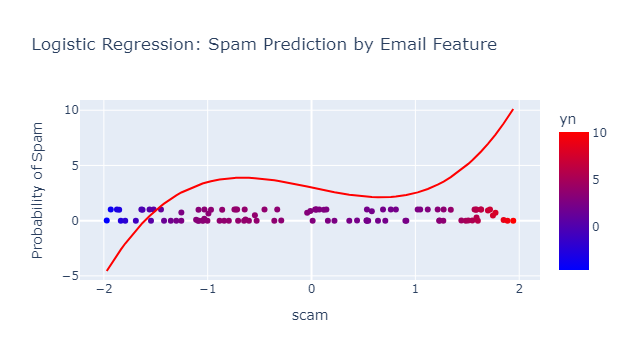

In [327]:

np.random.seed(42)
num_points = 100
X = np.random.uniform(-10, 10, num_points).reshape(-1, 1) 

y = (1 / (1 + np.exp(-X.flatten()))) > 0.5  


model = LogisticRegression()
model.fit(X, y)


y_prob = model.predict_proba(X)[:, 1]  

DF['predicted_prob'] = y_prob

fig = px.scatter(DF, 
                 x='scam', 
                 y='predicted_prob', 
                 color='yn',  
                 color_continuous_scale=['blue', 'red'],  # Blue for not spam, red for spam
                 labels={'feature': 'Email Feature', 'predicted_prob': 'Probability of Spam'},
                 title='Logistic Regression: Spam Prediction by Email Feature')
fig.add_trace(
    px.line(DF, x='scam', y='yn',color_discrete_sequence=['red']).data[0])
fig.show()


After several attempts I couldn't get it to look like I had in mind